In [1]:
import becquerel as bq
from becquerel import Spectrum
from becquerel.tools import Isotope, IsotopeQuantity, NeutronIrradiation
import datetime
import numpy as np
import scipy.integrate as integrate
import math as m
import importlib
import pandas as pd
import sys
import os
import csv
import matplotlib.pyplot as plt
import time
sys.path.insert(0,r"C:\Users\benhu\Desktop\Research\radwatch-analysis")

import analysis_methods as am
import ROI
importlib.reload(am)
importlib.reload(ROI)

<module 'ROI' from 'C:\\Users\\benhu\\Desktop\\Research\\radwatch-analysis\\ROI.py'>

In [2]:
source_energies = np.array([605, 609, 662, 1460, 2614]); #https://www.cpp.edu/~pbsiegel/bio431/genergies.html for energies
spectrum = r'C:\Users\benhu\Desktop\Research\DataFiles\UCB087_Wild_King_Salmon_2.Spe'
background = r'C:\Users\benhu\Desktop\Research\DataFiles\UCB096_Backgorund_2_13_17.Spe'
spec = Spectrum.from_file(spectrum)
bgspec = Spectrum.from_file(background)
counts = spec.counts_vals
energies = spec.bin_centers_kev

C:\Users\benhu\AppData\Roaming\Python\Python37\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


SpeFile: Reading file C:\Users\benhu\Desktop\Research\DataFiles\UCB087_Wild_King_Salmon_2.Spe
SpeFile: Reading file C:\Users\benhu\Desktop\Research\DataFiles\UCB096_Backgorund_2_13_17.Spe


In [3]:
startTime = time.time()
roi = ROI.ROI(spec, bgspec, source_energies, 0)
roi.find_peak_energies()
roi_counts, roi_unc = roi.get_counts()
executionTime = (time.time() - startTime)
print(roi_counts)
print(roi_unc)
print('Execution time:' + str(executionTime), 's')

c:\users\benhu\desktop\research\becquerel\becquerel\core\spectrum.py:440: DeprecationWarning: energies_kev is deprecated and will be removed in a future release. Use bin_centers_kev instead.
  DeprecationWarning)


background spec sidebands 415.5
bg peak counts 332.0
signal bg 694.0
signal peak 779.0
background spec sidebands 354.5
bg peak counts 783.9999999999999
signal bg 649.5
signal peak 1110.0
background spec sidebands 302.0
bg peak counts 366.99999999999994
signal bg 629.0
signal peak 1833.9999999999995
background spec sidebands 91.5
bg peak counts 820.0
signal bg 152.0
signal peak 26915.0
background spec sidebands 15.5
bg peak counts 455.99999999999994
signal bg 18.0
signal peak 432.0
[168.5, 31.000000000000114, 1139.9999999999995, 26034.5, -26.499999999999943]
[40.813600674285034, 48.948953002081666, 51.63816418115577, 166.9034151837523, 30.079062485390065]
Execution time:7.430557489395142 s


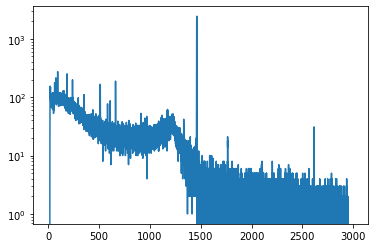

In [4]:
plt.plot(energies,counts)
plt.yscale('log')

C:\Users\benhu\AppData\Roaming\Python\Python37\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


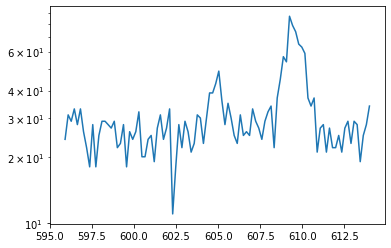

In [5]:
index0 = roi.f_near(energies, source_energies[0])
plt.plot(energies[index0-50:index0+50], counts[index0-50:index0+50])
plt.yscale('log')

C:\Users\benhu\AppData\Roaming\Python\Python37\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


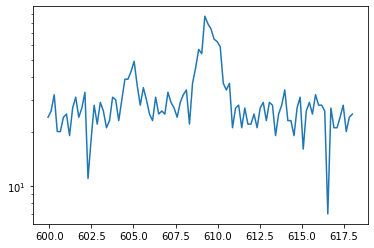

In [6]:
index1 = roi.f_near(energies, source_energies[1])
plt.plot(energies[index1-50:index1+50], counts[index1-50:index1+50])
plt.yscale('log')

C:\Users\benhu\AppData\Roaming\Python\Python37\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


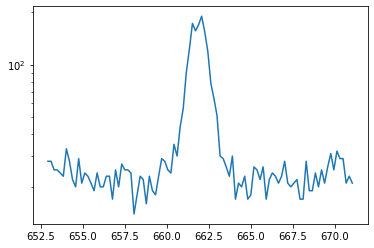

In [7]:
index2 = roi.f_near(energies, source_energies[2])
plt.plot(energies[index2-50:index2+50], counts[index2-50:index2+50])
plt.yscale('log')

C:\Users\benhu\AppData\Roaming\Python\Python37\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
c:\users\benhu\desktop\research\becquerel\becquerel\core\spectrum.py:440: DeprecationWarning: energies_kev is deprecated and will be removed in a future release. Use bin_centers_kev instead.
  DeprecationWarning)
c:\users\benhu\desktop\research\becquerel\becquerel\core\spectrum.py:440: DeprecationWarning: energies_kev is deprecated and will be removed in a future release. Use bin_centers_kev instead.
  DeprecationWarning)
c:\users\benhu\desktop\research\becquerel\becquerel\core\spectrum.py:440: DeprecationWarning: energies_kev is deprecated and will be removed in a future release. Use bin_centers_kev instead.
  Depre

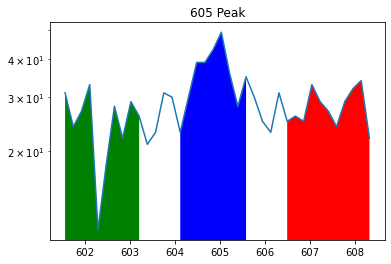

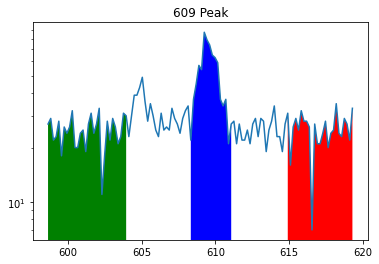

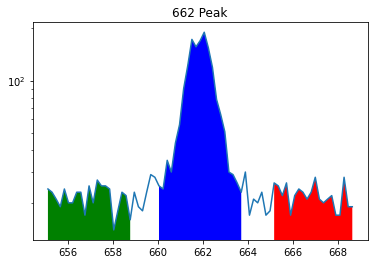

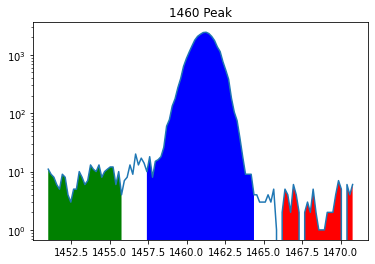

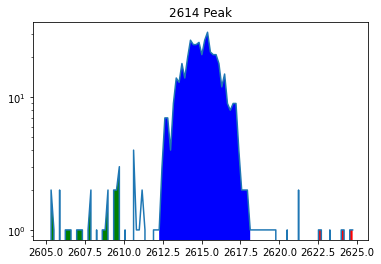

In [8]:
roi.set_sideband(605, 2, [[-1.8, -0.75], [-0.5, 0.4], [0.75, 1.8]])
roi.set_sideband(609, 5.25, [[-2, -0.925], [-0.15, 0.45], [1.1, 2]])
roi.set_sideband(662, 4, [[-1.75, -0.75], [-0.5, 0.5], [0.75, 1.75]])
roi.set_sideband(1460, 5, [[-2, -1], [-0.725, 0.725], [1, 2]])
roi.set_sideband(2614, 5, [[-2, -1], [-0.575, 0.675], [1, 2]])

roi.plot_peak_region(spec, source_energies, 605)
roi.plot_peak_region(spec, source_energies, 609)
roi.plot_peak_region(spec, source_energies, 662)
roi.plot_peak_region(spec, source_energies, 1460)
roi.plot_peak_region(spec, source_energies, 2614)

In [19]:
plot_eff = am.Efficiency(source_energies)

plot_eff.mutate()
plot_eff.fitting()
plot_eff.plotter()

TypeError: 'NoneType' object is not iterable

In [17]:
eff_func.set_parameters()
eff_func.save_fit(source_energies)

FileNotFoundError: [Errno 2] No such file or directory: 'eff_calibration_parameters.txt'